In [7]:
# Zadanie 1: sprawdź poniżej inne elementy wczytanego zbioru danych, w szczególności opis.
from sklearn import datasets
#Wczytaj przykładowy zbiór danych
iris = datasets.load_iris()
#OPIS:
print(iris['DESCR'])
#LISTA NAZW KWIATÓW
#TABELKA
for x in range (0,len(iris['data']),10):
    print("Kwiatek: ", x, "w zbiorze to", iris['target_names'][iris['target'][x]],",wymiary irysa:")
    print("długość kielicha:",iris['data'][x][0],", szerokość kileicha:",iris['data'][x][1],
          ", długość płatka:",iris['data'][x][2],", szerokość płatka:",iris['data'][x][3])
#POWYŻEJ DANE, KTÓRE BĘDĄ OPISYWAĆ KWIATEK np. Kwiatek 1 w zbiorze o takich a nie innych parametrach

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

WARTOŚCI: [1, 9, 17]


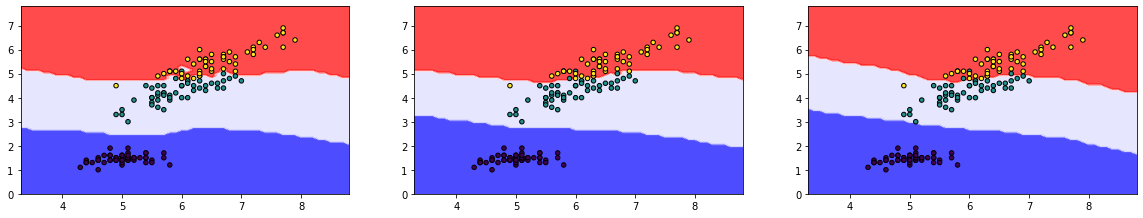

[0.9777777777777777, 0.9777777777777777, 0.9777777777777777]


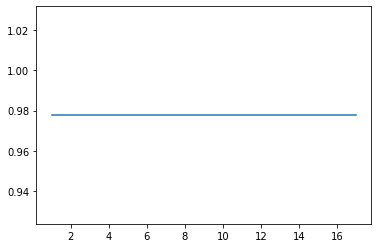

In [13]:
# Zadanie 2:
# Stwórz listę kilku wybranych przez siebie wartości dla parametru n_neighbors
# W pętli 'for' użyj kolejnych wartości parametru do stworzenia klasyfikatora
# Następnie naucz go na danych uczących
# Zapisz wynik scoringu na danych testowych do osobnej listy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.gridspec as gridspec
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier


iris = datasets.load_iris()

X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

lista_n = []
dokladnosci = []

# tworzę listę wartości dla parametru n_neighbors
for i in range (1, 24, 8):
  lista_n.append(i)
print('WARTOŚCI:',lista_n)

sx=0
fig = plt.figure(figsize=(20, 20))
gs = gridspec.GridSpec(5, 3)
for el in lista_n:
  knn = KNeighborsClassifier(el)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  dokladnosc = knn.score(X_test, y_test)
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
           np.arange(y_min, y_max, 0.1))
  #DOKŁADNOŚCI
  dokladnosci.append(dokladnosc)
  knn.fit(X_train[:, [0, 2]], y_train)
  Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.subplot(gs[sx])
  sx+=1
  plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.bwr)
  plt.scatter(X[:, 0], X[:, 2], c=y, s=20, edgecolor='k')
plt.show()
#WYKRES ZALEŻNOŚCI,SPLOT RYSUJE FUNKCJE   
print(dokladnosci)    
%matplotlib inline
plt.plot(lista_n, dokladnosci)
plt.show()


CO MAMY W ZBIORZE:  ['data', 'target', 'target_names', 'DESCR', 'feature_names']


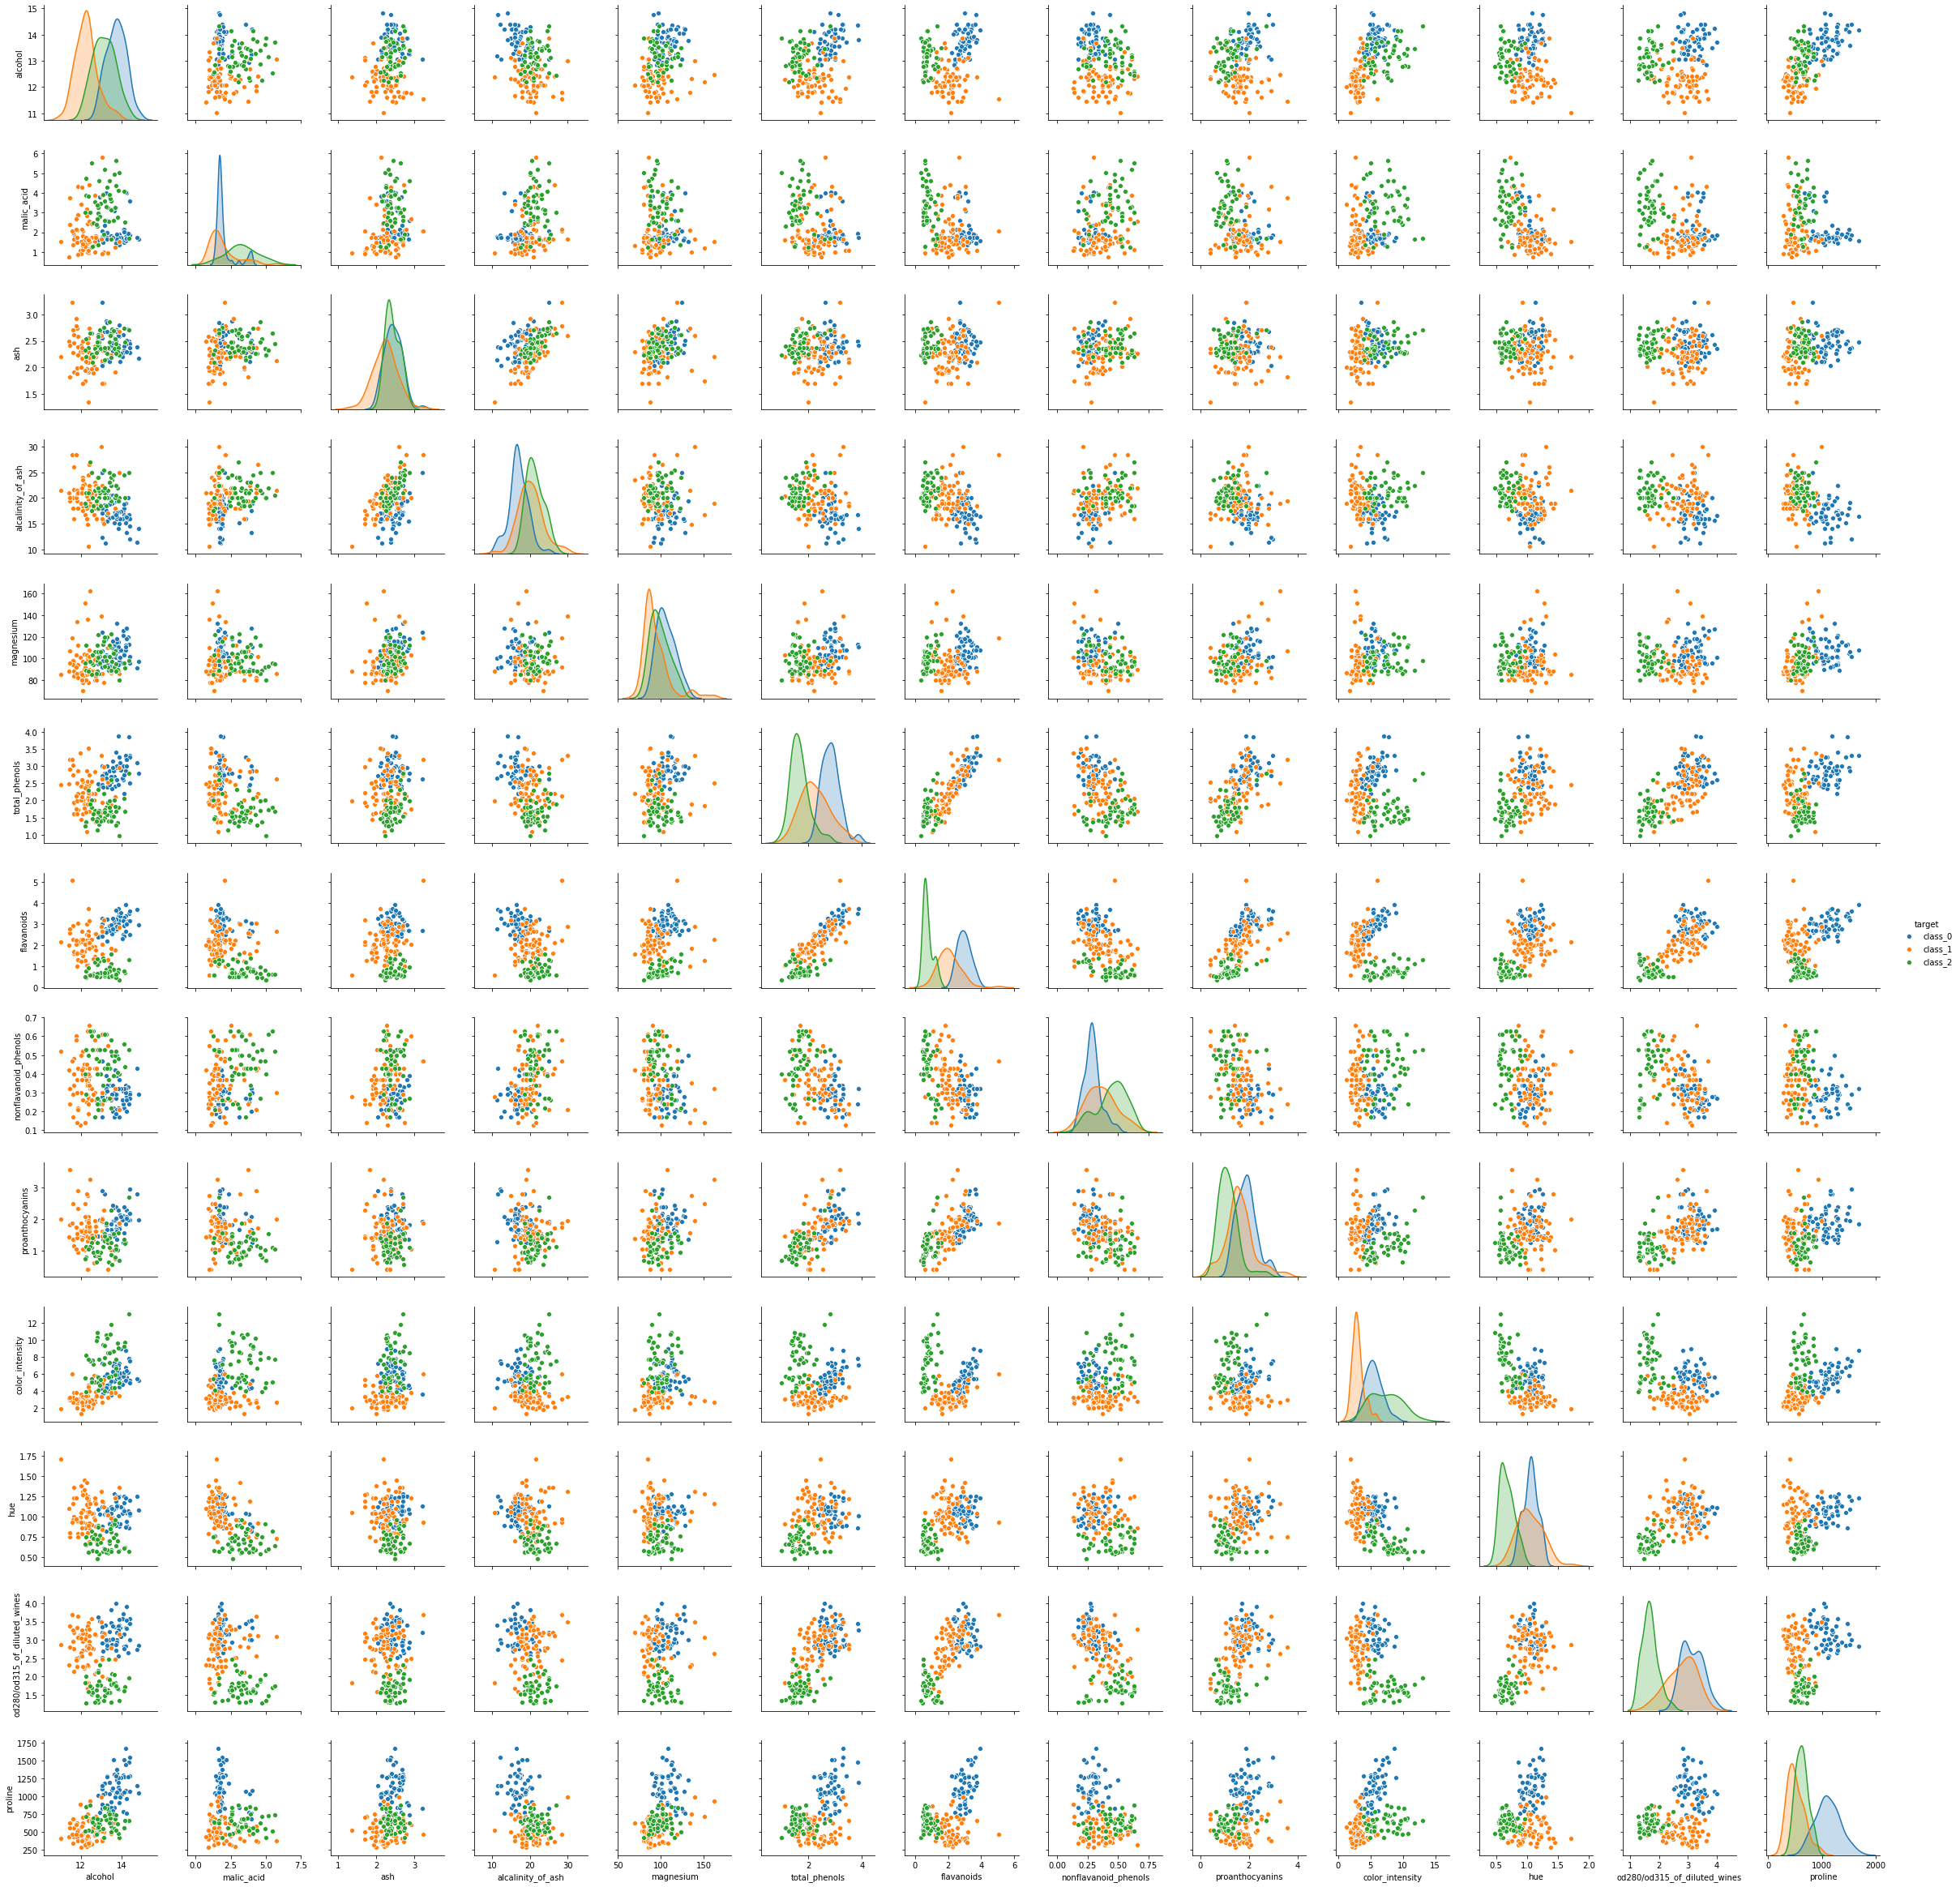

['Wartosci przewidziane: ', array([2, 0, 0, 0])]
['Dokładność klasyfikatora: ', 0.7777777777777778]


confusion matrix:
 [[20  0  2]
 [ 3 14  2]
 [ 0  5  8]]


classification report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89        22
           1       0.74      0.74      0.74        19
           2       0.67      0.62      0.64        13

    accuracy                           0.78        54
   macro avg       0.76      0.75      0.76        54
weighted avg       0.77      0.78      0.78        54



In [15]:
# Zadanie 3:
# wczytaj dane o winach za pomocą funkcji poniżej
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
%matplotlib inline
import seaborn as sns


wine_data = load_wine()

#CHANGE
print('CO MAMY W ZBIORZE: ', list(wine_data.keys()))

#KONWERT
wine_data_df = pd.DataFrame(wine_data['data'], columns=wine_data['feature_names'])

wine_data_df.head()

#ZMIANA WARTOŚCI LICZBOWYCH NA TEKSTOWE
targets = map(lambda x: wine_data['target_names'][x], wine_data['target'] )

#TWORZENIE ARRAY
wine_data_df['target'] = np.array(list(targets))

#RYSOWANIE WYKRESU
sns.pairplot(wine_data_df, hue='target')
plt.show()

# Podziel zbiór danych na uczący i testowy.
X = wine_data.data
y = wine_data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

#klasyfikator kNN
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

#DZIAŁANIE NA ZBIORZE TESTOWYM
y_pred = knn.predict(X_test)

print(["Wartosci przewidziane: ", y_pred[:4]])
print(["Dokładność klasyfikatora: ", knn.score(X_test, y_test)])


# Wypisz raport z uczenia: confusion_matrix oraz classification_report
print("\n\nconfusion matrix:\n",confusion_matrix(y_test, y_pred))
print("\n\nclassification report:\n",classification_report(y_test, y_pred))


Elementy zbioru:  ['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url']
['1' '1' '1' ... '2' '1' '1']
{'V2': ['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown'], 'V3': ['divorced', 'married', 'single'], 'V4': ['primary', 'secondary', 'tertiary', 'unknown'], 'V5': ['no', 'yes'], 'V7': ['no', 'yes'], 'V8': ['no', 'yes'], 'V9': ['cellular', 'telephone', 'unknown'], 'V11': ['apr', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep'], 'V16': ['failure', 'other', 'success', 'unknown']}
{'id': '1461', 'name': 'bank-marketing', 'version': '1', 'format': 'ARFF', 'upload_date': '2015-05-21T22:16:49', 'licence': 'Public', 'url': 'https://www.openml.org/data/v1/download/1586218/bank-marketing.arff', 'file_id': '1586218', 'default_target_attribute': 'Class', 'tag': ['OpenML-CC18', 'OpenML100', 'study_123', 'study_135', 'study_14', 'study_218', 'st

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


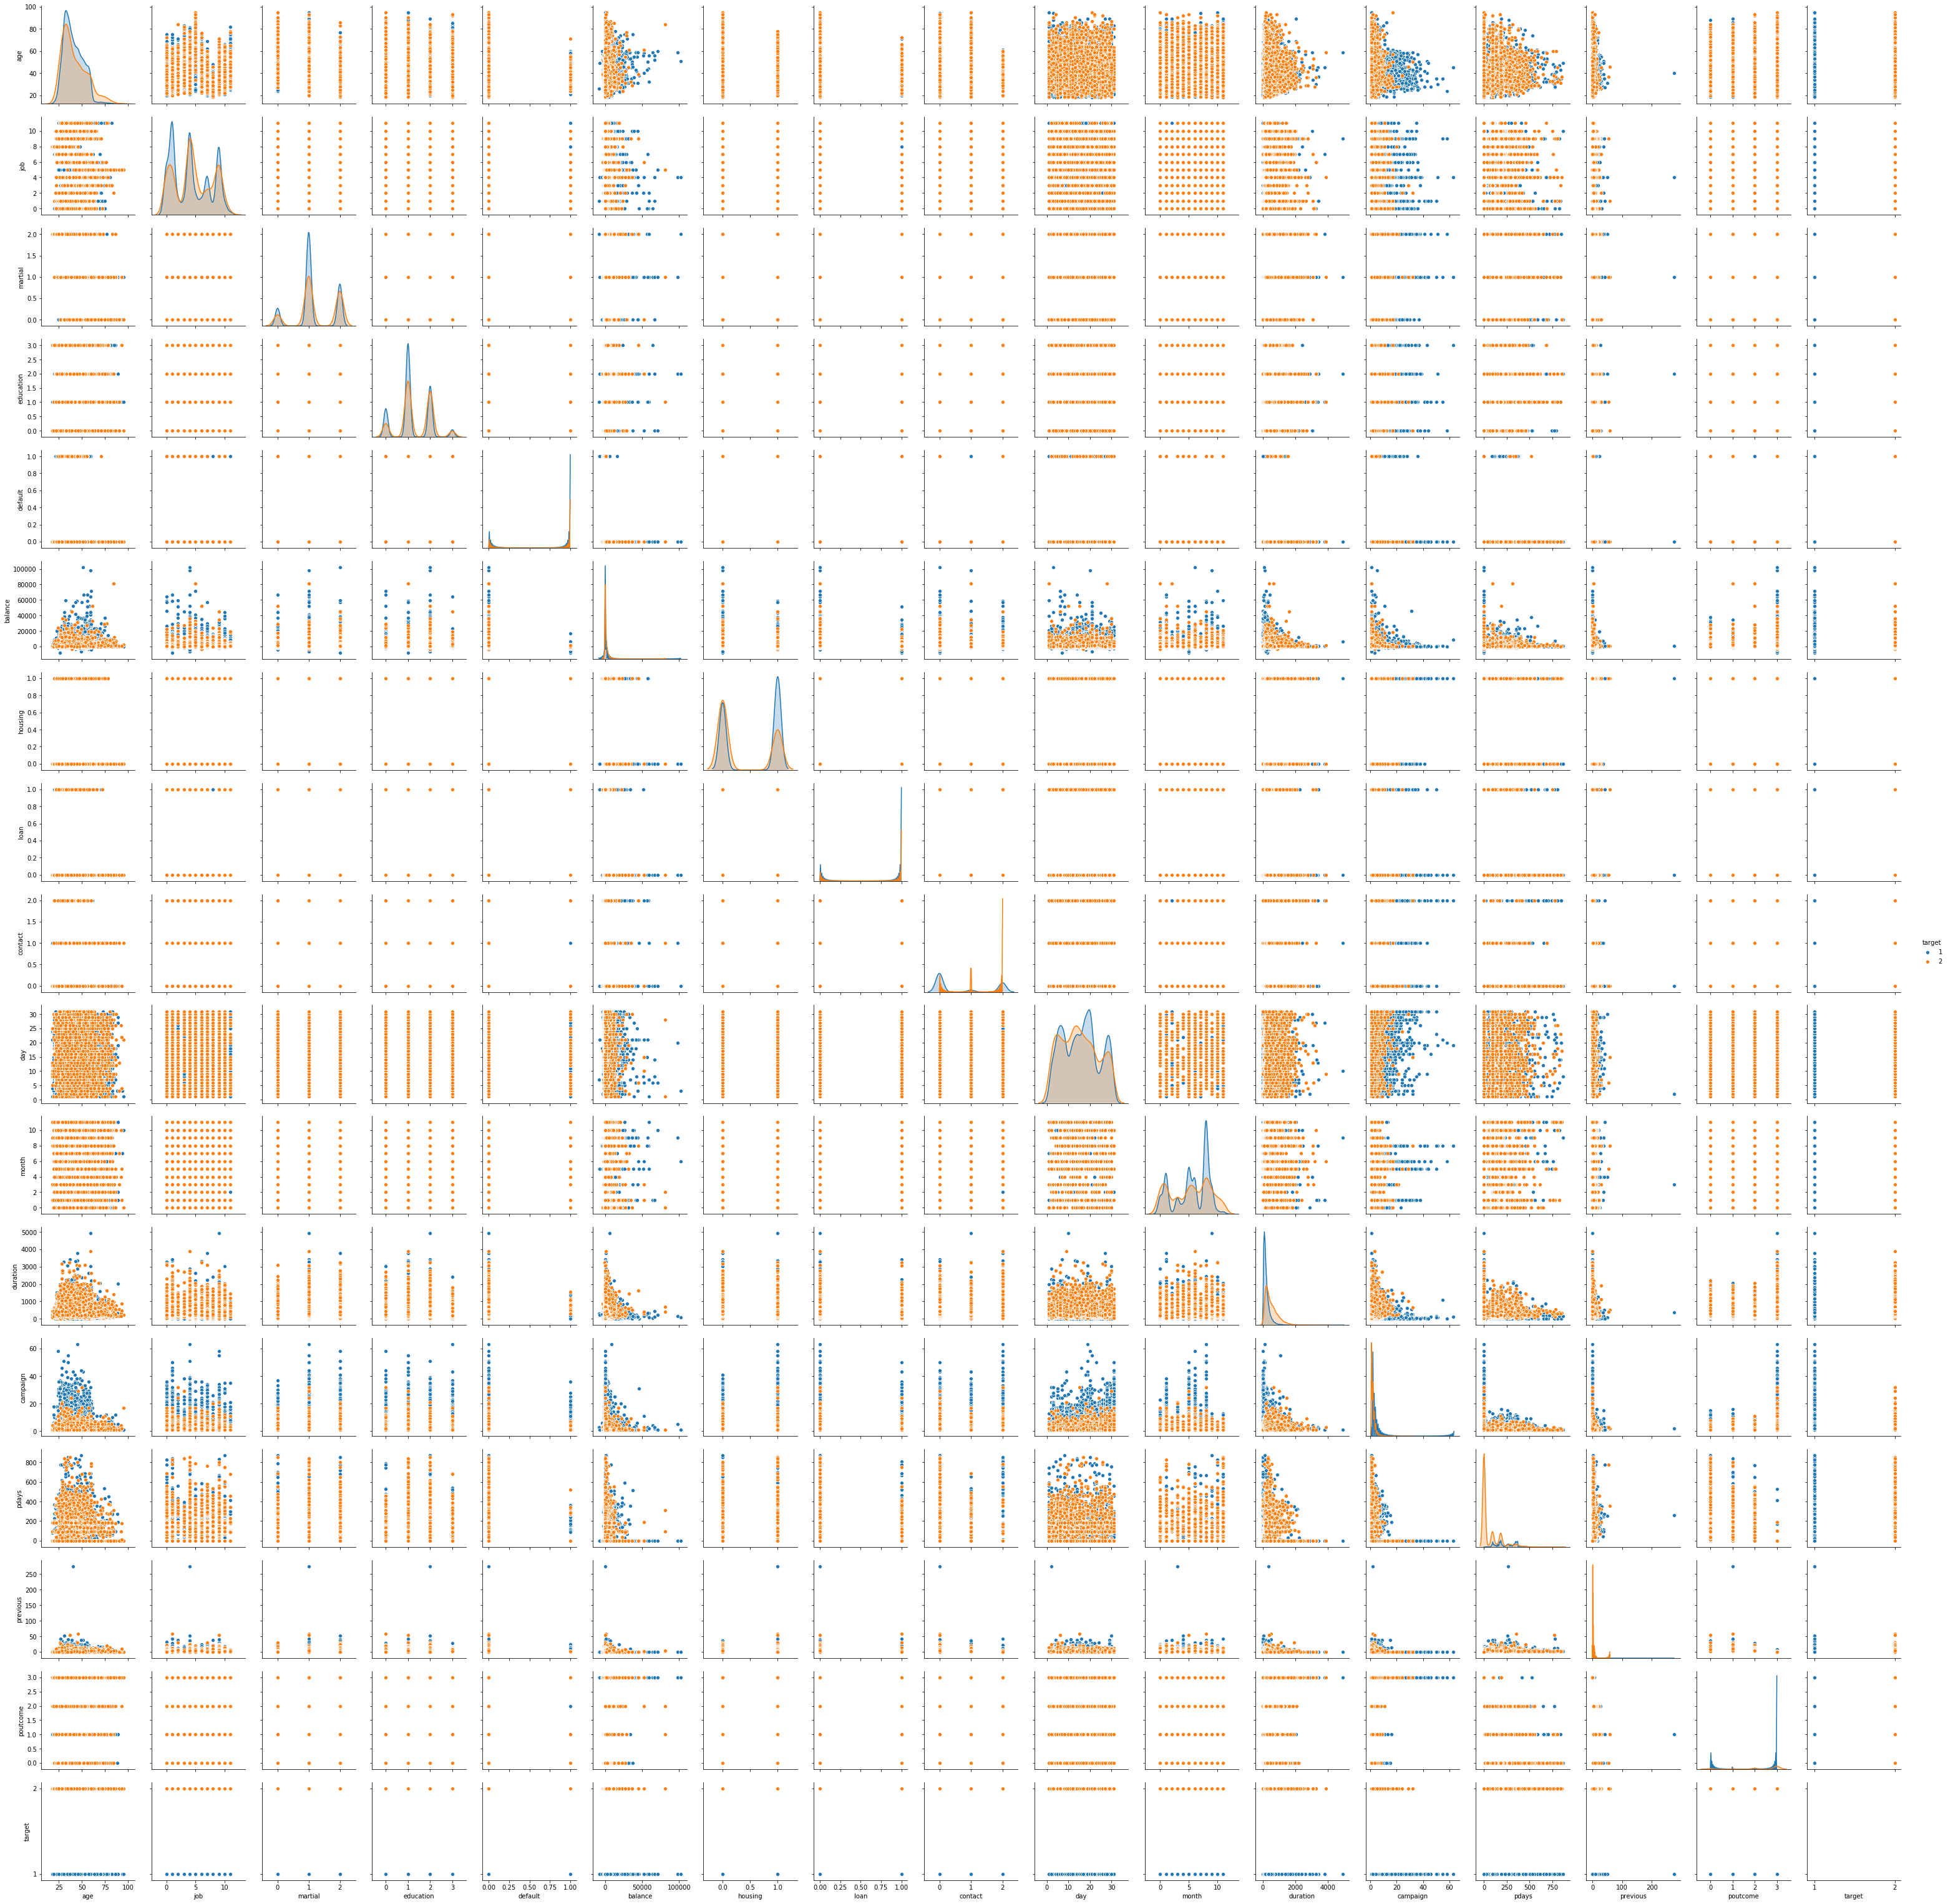

['Wartosci: ', array(['1', '1', '1', '1', '1'], dtype=object)]
['KLASYFIKATOR: ', 0.8828629567371494]


confusion matrix:
 [[19288   666]
 [ 1982   670]]


classification report:
               precision    recall  f1-score   support

           1       0.91      0.97      0.94     19954
           2       0.50      0.25      0.34      2652

    accuracy                           0.88     22606
   macro avg       0.70      0.61      0.64     22606
weighted avg       0.86      0.88      0.87     22606



In [27]:
# Zadanie bonus:
# Wczytaj dane za pomocą funkcji fetch_openml
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Funkcja przyjmuje jako parametr nazwę zbioru danych z https://www.openml.org/search?type=data
# Proponuję zbiór 'bank-marketing', ale możesz wybrać dowolny inny z kategorii "klasyfikacja"
bm_data = fetch_openml(data_id=1461)

bm_data['feature_names'] = [
                            'age',
                            'job',
                            'martial',
                            'education',
                            'default',
                            'balance',
                            'housing',
                            'loan',
                            'contact',
                            'day',
                            'month',
                            'duration',
                            'campaign',
                            'pdays',
                            'previous',
                            'poutcome'
]
print('Elementy zbioru: ', list(bm_data.keys()))
print(bm_data.target)
print(bm_data.categories)
print(bm_data.details)

# konwersja na data frame
bm_data_df = pd.DataFrame(bm_data['data'], columns=bm_data['feature_names'])

# dodajemy do df target
bm_data_df['target'] = bm_data.target

# podgląd danych
print("\n",bm_data_df.head())

# wykres - generuje się bardzo długo
sns.pairplot(bm_data_df, hue='target')
plt.show()

# Podziel zbiór danych na uczący i testowy.
X = bm_data.data
y = bm_data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Wytrenuj klasyfikator kNN
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train, y_train)

# Dokonaj predykcji na zbiorze testowym
y_pred = knn.predict(X_test)

print(["Wartosci: ", y_pred[:4]])
print(["KLASYFIKATOR: ", knn.score(X_test, y_test)])


# Wypisz raport z uczenia: confusion_matrix oraz classification_report
print("\n\nconfusion matrix:\n",confusion_matrix(y_test, y_pred))
print("\n\nclassification report:\n",classification_report(y_test, y_pred))